In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_log_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import classification_report
from sklearn import svm
from sklearn.metrics import f1_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import learning_curve

In [ ]:
%cd 'drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары'

/content/drive/MyDrive/Colab Notebooks/Машинное обучение/Семинары


In [ ]:
df = pd.read_csv('diabetes.csv')
df.head(5)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df_differences = pd.DataFrame(columns=['Тип модели классификации', 'Accuracy_score', 'Precision_score', 'Recall_score', 'F1_score'])
i = 0

### Что предсказываем

In [ ]:
Y = df.Outcome
X = df.drop(['Outcome'], axis=1)

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

In [ ]:
from sklearn.linear_model import LogisticRegression
cls = LogisticRegression()

In [ ]:
cls.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
y_pred = cls.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

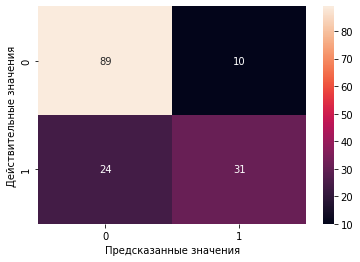

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

In [ ]:
metrics.precision_score(y_test, y_pred)

0.7560975609756098

In [ ]:
metrics.recall_score(y_test, y_pred)

0.5636363636363636

In [ ]:
metrics.f1_score(y_test, y_pred)

0.6458333333333333

In [ ]:
report = classification_report(y_test, y_pred, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [ ]:
df_differences.loc[i] = ['Логистическая регрессия',
                         metrics.accuracy_score(y_test, y_pred),
                         metrics.precision_score(y_test, y_pred),
                         metrics.recall_score(y_test, y_pred),
                         metrics.f1_score(y_test, y_pred)]
i += 1

### Сделайте вывод о применимости модели.

* Из accuracy мы видим, что только ~78% от всех результатов модель определяет верно 
* И при этом только 75% (precision) объектов , выделенных классификатором как положительные, действительно являются положительными 
* А из recall (полнота) - только 56% положительных объектов было выделено классификатором как положительные. 
* Из этого можно сделать вывод, что модель неприменима т.к. несёт большие потери и имеет низкую точность определения заболевания


**1. Используйте метод опорных векторов для построения альтернативной модели предсказания диабета.**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

In [ ]:
clf2 = svm.SVC()

In [ ]:
clf2.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = clf2.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[93,  6],
       [27, 28]])

Text(0.5, 15.0, 'Предсказанные значения')

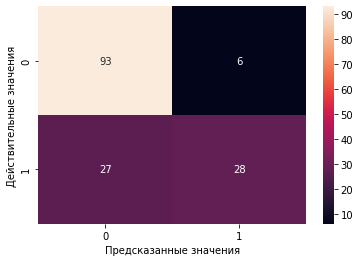

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7857142857142857

In [ ]:
metrics.precision_score(y_test, y_pred)

0.8235294117647058

In [ ]:
metrics.recall_score(y_test, y_pred)

0.509090909090909

In [ ]:
metrics.f1_score(y_test, y_pred)

0.6292134831460674

In [ ]:
report = classification_report(y_test, y_pred, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.82      0.51      0.63        55

    accuracy                           0.79       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154



### Вторая модель (svm)  немного лучше первой

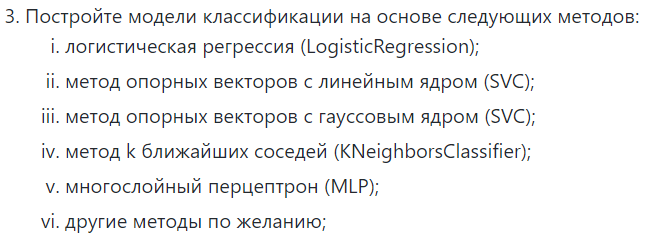

## Метод опорных векторов с линейным ядром (SVC);

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

In [ ]:
clf2 = svm.SVC(kernel='linear')

In [ ]:
clf2.fit(x_train, y_train)

SVC(kernel='linear')

In [ ]:
y_pred = clf2.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[89, 10],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

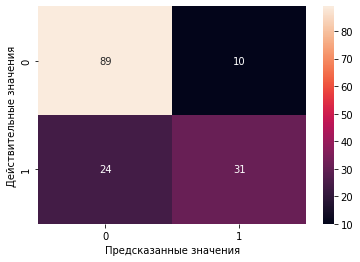

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7792207792207793

In [ ]:
metrics.precision_score(y_test, y_pred)

0.7560975609756098

In [ ]:
metrics.recall_score(y_test, y_pred)

0.5636363636363636

In [ ]:
metrics.f1_score(y_test, y_pred)

0.6458333333333333

In [ ]:
report = classification_report(y_test, y_pred, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154



In [ ]:
df_differences.loc[i] = ['Метод опорных векторов с линейным ядром',
                         metrics.accuracy_score(y_test, y_pred),
                         metrics.precision_score(y_test, y_pred),
                         metrics.recall_score(y_test, y_pred),
                         metrics.f1_score(y_test, y_pred)]
i += 1

# Метод опорных векторов с гауссовым ядром (SVC);

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

In [ ]:
clf2 = svm.SVC(kernel='rbf')

In [ ]:
clf2.fit(x_train, y_train)

SVC()

In [ ]:
y_pred = clf2.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[93,  6],
       [27, 28]])

Text(0.5, 15.0, 'Предсказанные значения')

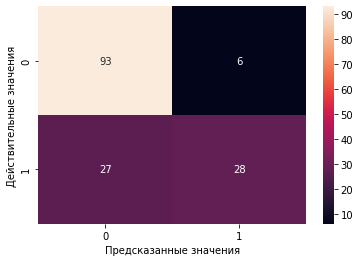

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7857142857142857

In [ ]:
metrics.precision_score(y_test, y_pred)

0.8235294117647058

In [ ]:
metrics.recall_score(y_test, y_pred)

0.509090909090909

In [ ]:
metrics.f1_score(y_test, y_pred)

0.6292134831460674

In [ ]:
report = classification_report(y_test, y_pred, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.78      0.94      0.85        99
           1       0.82      0.51      0.63        55

    accuracy                           0.79       154
   macro avg       0.80      0.72      0.74       154
weighted avg       0.79      0.79      0.77       154



In [ ]:
df_differences.loc[i] = ['Метод опорных векторов с гауссовым ядром',
                         metrics.accuracy_score(y_test, y_pred),
                         metrics.precision_score(y_test, y_pred),
                         metrics.recall_score(y_test, y_pred),
                         metrics.f1_score(y_test, y_pred)]
i += 1

## Метод k ближайших соседей (KNeighborsClassifier);

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

In [ ]:
clf2 = KNeighborsClassifier()

In [ ]:
clf2.fit(x_train, y_train)

KNeighborsClassifier()

In [ ]:
y_pred = clf2.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[82, 17],
       [24, 31]])

Text(0.5, 15.0, 'Предсказанные значения')

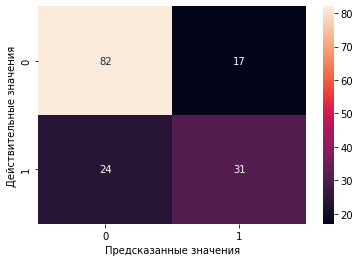

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.7337662337662337

In [ ]:
metrics.precision_score(y_test, y_pred)

0.6458333333333334

In [ ]:
metrics.recall_score(y_test, y_pred)

0.5636363636363636

In [ ]:
metrics.f1_score(y_test, y_pred)

0.6019417475728155

In [ ]:
report = classification_report(y_test, y_pred, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.77      0.83      0.80        99
           1       0.65      0.56      0.60        55

    accuracy                           0.73       154
   macro avg       0.71      0.70      0.70       154
weighted avg       0.73      0.73      0.73       154



In [ ]:
df_differences.loc[i] = ['Метод k ближайших соседей',
                         metrics.accuracy_score(y_test, y_pred),
                         metrics.precision_score(y_test, y_pred),
                         metrics.recall_score(y_test, y_pred),
                         metrics.f1_score(y_test, y_pred)]
i += 1

## Многослойный перцептрон (MLP);

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2,
                                                    random_state=True)

In [ ]:
clf2 = MLPClassifier()

In [ ]:
clf2.fit(x_train, y_train)

MLPClassifier()

In [ ]:
y_pred = clf2.predict(x_test)

In [ ]:
from sklearn import metrics
metrics.confusion_matrix(y_test, y_pred)

array([[83, 16],
       [34, 21]])

Text(0.5, 15.0, 'Предсказанные значения')

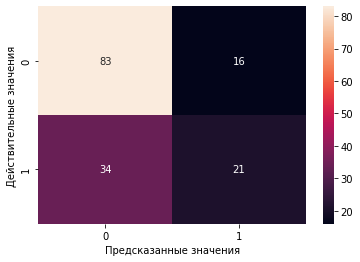

In [ ]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
class_names = [0, 1]
fig, ax = plt.subplots()
ticks = np.arange(len(class_names))
plt.xticks(ticks, class_names)
plt.yticks(ticks, class_names)
sns.heatmap(pd.DataFrame(
    metrics.confusion_matrix(y_test, y_pred)),
    annot=True)
plt.ylabel('Действительные значения')
plt.xlabel('Предсказанные значения')

In [ ]:
metrics.accuracy_score(y_test, y_pred)

0.6753246753246753

In [ ]:
metrics.precision_score(y_test, y_pred)

0.5675675675675675

In [ ]:
metrics.recall_score(y_test, y_pred)

0.38181818181818183

In [ ]:
metrics.f1_score(y_test, y_pred)

0.4565217391304348

In [ ]:
report = classification_report(y_test, y_pred, target_names=['0', '1'])
print(report)

              precision    recall  f1-score   support

           0       0.71      0.89      0.79        99
           1       0.63      0.35      0.45        55

    accuracy                           0.69       154
   macro avg       0.67      0.62      0.62       154
weighted avg       0.68      0.69      0.67       154



In [ ]:
df_differences.loc[i] = ['Многослойный перцептрон',
                         metrics.accuracy_score(y_test, y_pred),
                         metrics.precision_score(y_test, y_pred),
                         metrics.recall_score(y_test, y_pred),
                         metrics.f1_score(y_test, y_pred)]
i += 1

**4. Проанализируйте метрики каждой модели и сделайте выводы об их эффективности и применимости. Сравните эффективность всех этих моделей и выберите лучшую;**

In [ ]:
df_differences

,Тип модели классификации,Accuracy_score,Precision_score,Recall_score,F1_score
0,Логистическая регрессия,0.779221,0.756098,0.563636,0.645833
1,Метод опорных векторов с линейным ядром,0.779221,0.756098,0.563636,0.645833
2,Метод опорных векторов с гауссовым ядром,0.785714,0.823529,0.509091,0.629213
3,Метод k ближайших соседей,0.733766,0.645833,0.563636,0.601942
4,Многослойный перцептрон,0.694805,0.633333,0.345455,0.447059
